In [1]:
# Download the following nltk data if not done already
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
import string
import pandas as pd
import nltk

In [27]:
csv_file_path = 'med-transcript-dataset.csv'
df = pd.read_csv(csv_file_path)

In [33]:
n_transcripts = df.shape[0]
print(n_transcripts, ' total transcripts\n')
med_type_col = df['Meditation_Type']
print(med_type_col.value_counts())

4721  total transcripts

Meditation_Type
visualization    1729
movement          964
body-scan         854
focused           839
reflection        310
Name: count, dtype: int64


Based on the data, there are much more 'visualization' meditation videos on Youtube, and there is few 'reflection' ones.

Let's analyze what the most common words are. If there a lot of additional random words in the transcripts then, maybe we can catch them.

In [20]:
def get_freq_dist(csv_file_path):
    df = pd.read_csv(csv_file_path, encoding='utf8')
    script = ''
    # Only consider text from the Scripts
    for idx, item in df.iterrows():
        s = item['Script']
        script += s.lower()  # lower case everything
    print('Loaded text')

    text = ''
    # Remove punctuation marks
    text = script.translate(str.maketrans('','', string.punctuation))
    print('Removed punctuation marks')

    # Use to Stem text (reduce words to their base form)
    ps = nltk.stem.PorterStemmer()

    words = nltk.tokenize.word_tokenize(text)
    # all_word_dist = nltk.FreqDist(w.lower() for w in all_words)  # Frequency Distribution

    stopwords = nltk.corpus.stopwords.words('english')
    no_stopwords_dist = nltk.FreqDist(ps.stem(w) for w in words if w.isalpha() and w not in stopwords) # and w not in EXPECTED_WORDS)
    print('Got Frequency Distribution')
    return no_stopwords_dist

In [21]:
no_stopwords_dist = get_freq_dist(csv_file_path)

Loaded text
Removed punctuation marks
Got Frequency Distribution


In [22]:
EXTRA_STOP_WORDS = ['like', 'come', 'one', 'know']

common_words_no_stops = no_stopwords_dist.most_common(30)#.keys()
common_words_no_stops = dict(common_words_no_stops)

# Remove common words that have no meaning
# final_common_words = 
print(common_words_no_stops)

{'feel': 57857, 'breath': 53315, 'bodi': 44162, 'go': 39520, 'let': 33756, 'mind': 29829, 'relax': 28184, 'love': 28110, 'take': 25799, 'back': 23806, 'life': 23302, 'right': 22161, 'time': 21698, 'like': 20861, 'energi': 20751, 'come': 20635, 'moment': 20157, 'one': 19683, 'know': 19430, 'allow': 18455, 'see': 18156, 'way': 17983, 'your': 16650, 'awar': 16085, 'notic': 15677, 'thought': 14807, 'need': 14524, 'get': 14434, 'thank': 14359, 'open': 14244}


<Axes: >

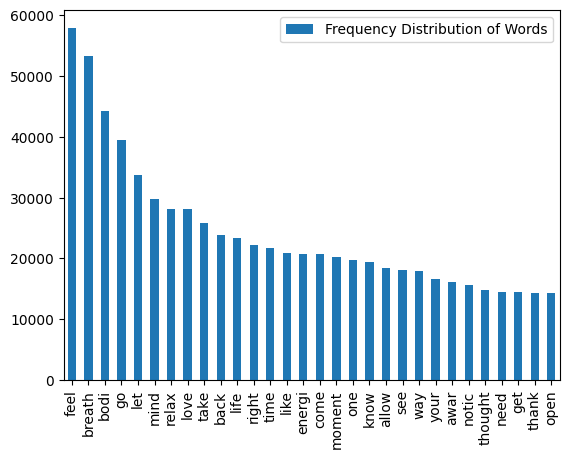

In [23]:
# plot
df = pd.DataFrame(
    {'Frequency Distribution of Words':list(common_words_no_stops.values())},
    index=list(common_words_no_stops.keys())
)
df.plot(kind='bar')
# plt.hist(common_words_no_stops)
# plt.bar(common_words_no_stops.keys(), common_words_no_stops.values())